In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as ss
import statsmodels.api as sm

In [ ]:
# Make random sample of 100 points between 0 & 10
# rvs - random variables
n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)
x = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale=1, size=n)

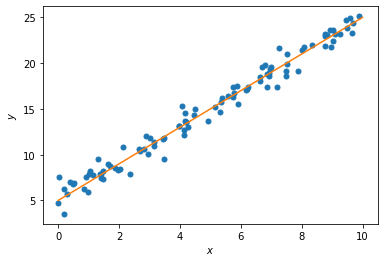

In [15]:
plt.figure()
plt.plot(x, y, "o", ms=5);
xx = np.array([0,10])
plt.plot(xx, beta_0 + beta_1 * xx);
plt.xlabel("$x$");
plt.ylabel("$y$");

In [17]:
np.mean(x)

4.8587792760014565

In [18]:
np .mean(y)

14.80142786070299

In [20]:
# Computing Residual Square of Sums

def compute_rss(y_estimate, y):
    return sum(np.power(y-y_estimate, 2))

def estimate_y(x, b_0, b_1):
    return b_0 + b_1 * x

rss = compute_rss(estimate_y(x, beta_0, beta_1), y)
rss

81.540007425512

In [28]:
# Least Squares Estimation
rss = []
slopes = np.arange(-10, 15, 0.001)

for slope in slopes:
    rss.append(np.sum((y - beta_0 - slope * x)**2))

In [ ]:
rss

In [30]:
ind_min = np.argmin(rss)

In [31]:
print("Estimate for the slope: ", slopes[ind_min])

Estimate for the slope:  2.003999999993347


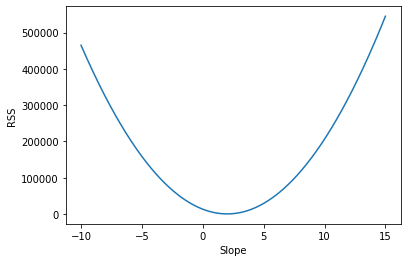

In [32]:
# Plot Figure
plt.figure()
plt.plot(slopes, rss)
plt.xlabel("Slope")
plt.ylabel("RSS");

In [35]:
# Simple Linear Regression
# OLS - Ordinary Least Squares
mod = sm.OLS(y, x)
est = mod.fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              2974.
Date:                Wed, 01 Jan 2020   Prob (F-statistic):                    1.14e-75
Time:                        18:40:49   Log-Likelihood:                         -246.89
No. Observations:                 100   AIC:                                      495.8
Df Residuals:                      99   BIC:                                      498.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [48]:
X = sm.add_constant(x)
mod = sm.OLS(y, X)
est = mod.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4115.
Date:                Wed, 01 Jan 2020   Prob (F-statistic):           7.47e-82
Time:                        19:22:19   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.174     30.041      0.0